In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [14]:
# Load the dataset
url = "https://github.com/owid/energy-data/raw/master/owid-energy-data.csv"
data = pd.read_csv(url)

In [15]:
# Columns of interest
columns_of_interest = [
    'year', 'country', 'population', 'gdp',
    'solar_consumption', 'wind_consumption', 'hydro_consumption', 
    'fossil_fuel_consumption', 'energy_per_capita', 'energy_per_gdp'
]

In [16]:
subset_data = data[columns_of_interest]

In [17]:
# Drop rows with missing values or fill with zeros
subset_data = subset_data.dropna()

In [18]:
# Filter data for two time periods: 2012-2016 and 2016-2022
period_1 = subset_data[(subset_data['year'] >= 2012) & (subset_data['year'] <= 2016)]
period_2 = subset_data[(subset_data['year'] >= 2016) & (subset_data['year'] <= 2021)]

In [19]:
# Create deep copies of the slices to avoid SettingWithCopyWarning
period_1 = subset_data[(subset_data['year'] >= 2012) & (subset_data['year'] <= 2016)].copy()
period_2 = subset_data[(subset_data['year'] >= 2016) & (subset_data['year'] <= 2021)].copy()

# Calculate total energy consumption for each period
period_1['total_energy_consumption'] = (period_1['solar_consumption'] +
                                        period_1['wind_consumption'] +
                                        period_1['hydro_consumption'] +
                                        period_1['fossil_fuel_consumption'])

period_2['total_energy_consumption'] = (period_2['solar_consumption'] +
                                        period_2['wind_consumption'] +
                                        period_2['hydro_consumption'] +
                                        period_2['fossil_fuel_consumption'])


In [20]:
# Group by country and calculate the mean for each period
period_1_avg = period_1.groupby('country').mean().reset_index()
period_2_avg = period_2.groupby('country').mean().reset_index()

In [21]:
# Merge the two datasets for comparison
comparison = period_1_avg.merge(period_2_avg, on='country', suffixes=('_2012_2016', '_2016_2021'))

In [22]:
# Calculate differences between the two periods
for col in ['population', 'gdp', 'solar_consumption', 'wind_consumption', 'hydro_consumption', 
            'fossil_fuel_consumption', 'energy_per_capita', 'energy_per_gdp', 'total_energy_consumption']:
    comparison[f'{col}_difference'] = comparison[f'{col}_2016_2021'] - comparison[f'{col}_2012_2016']

In [23]:
# Identify the top 5 energy users for each period
top_5_period_1 = period_1.groupby('country')['total_energy_consumption'].sum().reset_index()
top_5_period_1 = top_5_period_1.sort_values(by='total_energy_consumption', ascending=False).head(5)

top_5_period_2 = period_2.groupby('country')['total_energy_consumption'].sum().reset_index()
top_5_period_2 = top_5_period_2.sort_values(by='total_energy_consumption', ascending=False).head(5)

In [24]:
# Display the top 5 energy users
print("Top 5 Energy Users (2012-2016):")
print(top_5_period_1)

Top 5 Energy Users (2012-2016):
          country  total_energy_consumption
68          World                287014.894
12          China                168846.151
64  United States                114336.694
50         Russia                 37829.969
26          India                 37133.562


In [25]:
print("\nTop 5 Energy Users (2016-2021):")
print(top_5_period_2)


Top 5 Energy Users (2016-2021):
          country  total_energy_consumption
69          World                899570.481
12          China                228854.525
65  United States                138790.621
26          India                 52442.754
51         Russia                 46245.459


In [26]:
# Visualization: Bar Charts for Top 5 Energy Users
def plot_top_5(data, title):
    plt.figure(figsize=(8, 6))
    plt.bar(data['country'], data['total_energy_consumption'], color=['blue', 'orange', 'green', 'red', 'purple'])
    plt.title(title)
    plt.xlabel('Country')
    plt.ylabel('Total Energy Consumption')
    plt.show()
    plot_top_5(top_5_period_1, 'Top 5 Energy Users (2012-2016)')
    plot_top_5(top_5_period_2, 'Top 5 Energy Users (2016-2021)')

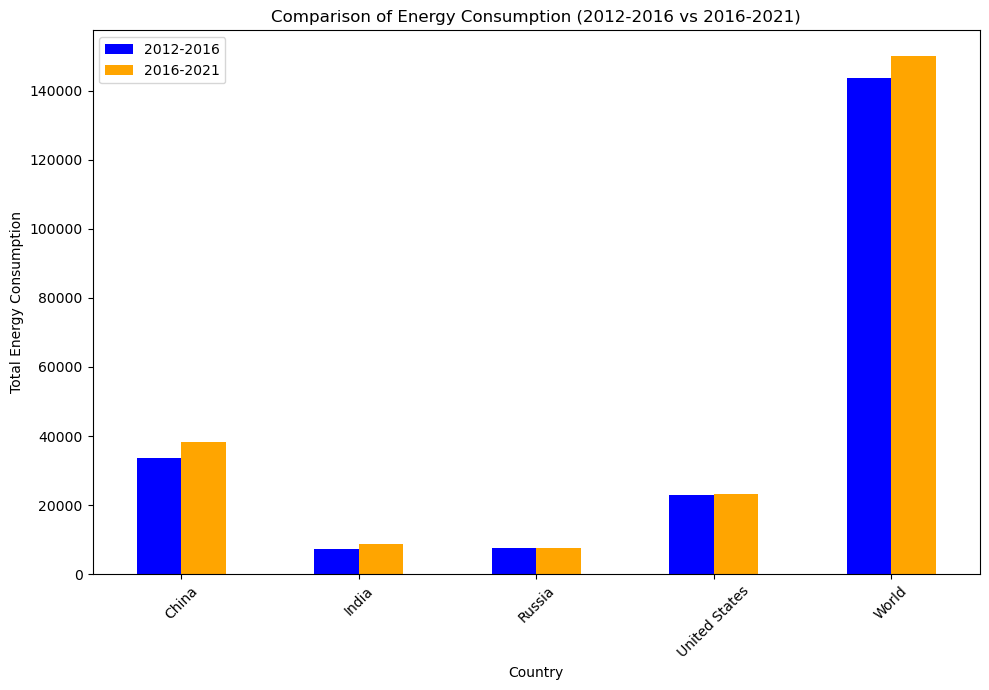

In [27]:
# Visualization: Comparison of the Two Periods
comparison_top_countries = comparison[comparison['country'].isin(top_5_period_1['country']) | comparison['country'].isin(top_5_period_2['country'])]
comparison_top_countries.set_index('country', inplace=True)
comparison_top_countries[['total_energy_consumption_2012_2016', 'total_energy_consumption_2016_2021']].plot(
    kind='bar', figsize=(10, 7), color=['blue', 'orange'])
plt.title('Comparison of Energy Consumption (2012-2016 vs 2016-2021)')
plt.xlabel('Country')
plt.ylabel('Total Energy Consumption')
plt.xticks(rotation=45)
plt.legend(['2012-2016', '2016-2021'])
plt.tight_layout()
plt.show()

BAR CHART

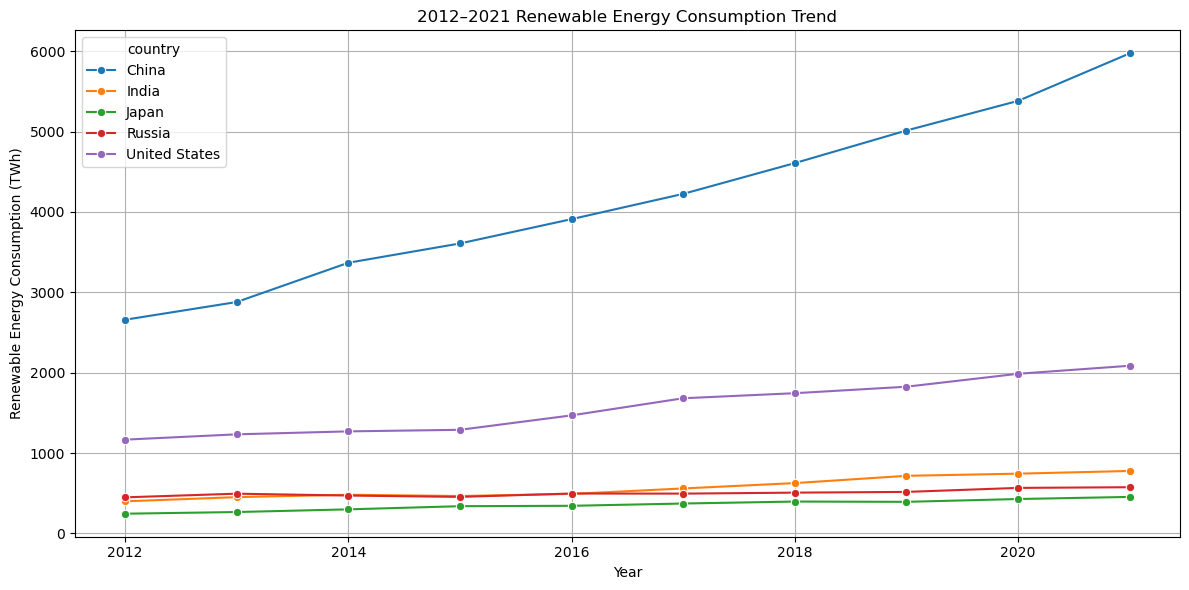

In [30]:
url = "https://github.com/owid/energy-data/raw/master/owid-energy-data.csv"
data = pd.read_csv(url)

# Select the required columns
columns_of_interest = [
    'year', 'country', 'population', 'gdp',
    'solar_consumption', 'wind_consumption', 'hydro_consumption'
]
df = data[columns_of_interest]

# Fill missing values
df = df.fillna(0)

# Keep only data from 2012 to 2021
df = df[(df['year'] >= 2012) & (df['year'] <= 2021)]

# Filter specific countries
countries = ['China', 'United States', 'Russia','India', 'Japan']
df = df[df['country'].isin(countries)]

# Add a "Total Renewables" column
df['total_renewables'] = df['solar_consumption'] + df['wind_consumption'] + df['hydro_consumption']

# Plot the graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='total_renewables', hue='country', marker='o')
plt.title('2012–2021 Renewable Energy Consumption Trend')
plt.ylabel('Renewable Energy Consumption (TWh)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()


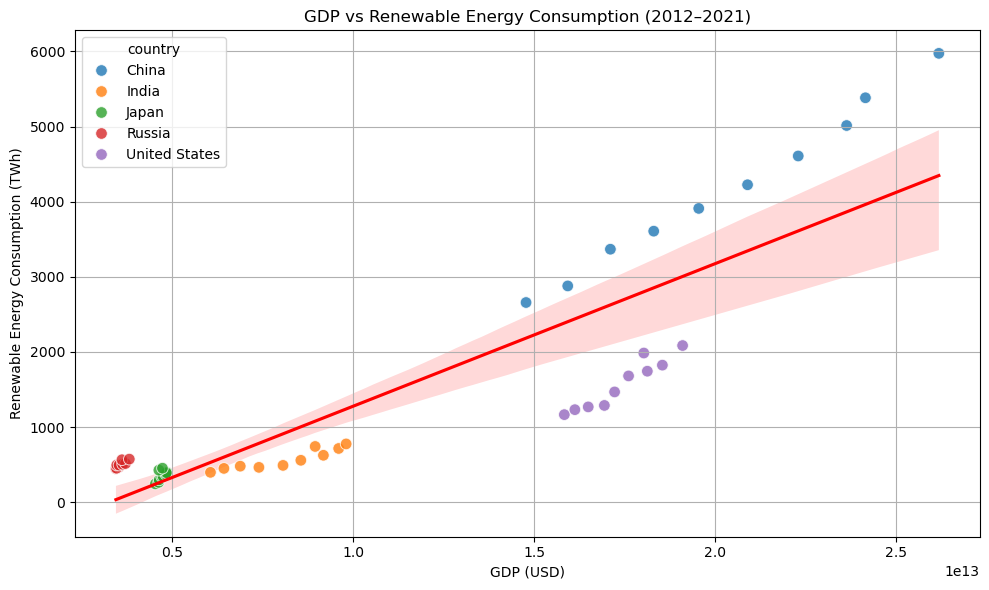

In [31]:
#Select columns
columns = ['year', 'country', 'gdp', 'solar_consumption', 'wind_consumption', 'hydro_consumption']
df = data[columns]

# Fill missing values
df = df.fillna(0)

# Filter by years and countries
df = df[(df['year'] >= 2012) & (df['year'] <= 2021)]
df = df[df['country'].isin(['China', 'United States', 'Russia','India', 'Japan'])]

# Calculate total renewable energy
df['total_renewables'] = df['solar_consumption'] + df['wind_consumption'] + df['hydro_consumption']

# Plot: GDP vs Renewable Energy Consumption (with regression line and confidence interval)
plt.figure(figsize=(10, 6))

# Regression line (all countries combined)
sns.regplot(
    data=df,
    x='gdp',
    y='total_renewables',
    scatter=False,
    line_kws={'color': 'red'},
    ci=95  # 95% confidence interval
)

# Add original data points (color by country)
sns.scatterplot(
    data=df,
    x='gdp',
    y='total_renewables',
    hue='country',
    s=70,
    alpha=0.8
)

plt.title('GDP vs Renewable Energy Consumption (2012–2021)')
plt.xlabel('GDP (USD)')
plt.ylabel('Renewable Energy Consumption (TWh)')
plt.grid(True)
plt.tight_layout()
plt.show()

Economic Growth Drives Renewable Energy: Higher GDP countries are investing more heavily in renewable energy infrastructure.

Policy & Resources Influence: The difference between countries like Russia and China indicates that factors beyond GDP (e.g., energy policies, natural resources) play a significant role in renewable energy adoption.

Although countries like Russia and China may have comparable levels of GDP for certain years, their renewable energy consumption differs significantly. This disparity suggests that GDP alone does not fully account for renewable energy adoption.

SyntaxError: invalid syntax (308882921.py, line 1)